## Project Goal
To predict the coffee stock closing price using Facebook Prophet

In [1]:
%pip install prophet
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from prophet import Prophet

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv("E:\coffee.csv", parse_dates=['Date'])

df.head()

Date    Open    High     Low   Close  Volume Currency
0 2000-01-03  122.25  124.00  116.10  116.50    6640      USD
1 2000-01-04  116.25  120.50  115.75  116.25    5492      USD
2 2000-01-05  115.00  121.00  115.00  118.60    6165      USD
3 2000-01-06  119.00  121.40  116.50  116.85    5094      USD
4 2000-01-07  117.25  117.75  113.80  114.15    6855      USD

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5746 entries, 0 to 5745
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5746 non-null   datetime64[ns]
 1   Open      5746 non-null   float64       
 2   High      5746 non-null   float64       
 3   Low       5746 non-null   float64       
 4   Close     5746 non-null   float64       
 5   Volume    5746 non-null   int64         
 6   Currency  5746 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 314.4+ KB


In [4]:
# 'Close' is the target variable
# drop 'Currency' column
df.drop(['Currency'], axis=1, inplace=True)

In [5]:
df.describe()

Open         High          Low        Close        Volume
count  5746.000000  5746.000000  5746.000000  5746.000000   5746.000000
mean    127.267635   128.847034   125.784669   127.215567   8807.178907
std      50.569425    51.164948    49.851487    50.506519   9612.789034
min      41.500000    42.000000    41.500000    41.500000      0.000000
25%      98.800000   100.112500    97.862500    98.650000     61.000000
50%     120.400000   121.600000   118.950000   120.250000   7008.000000
75%     144.800000   146.000000   143.000000   144.337500  14497.750000
max     305.300000   306.250000   304.000000   304.900000  62045.000000

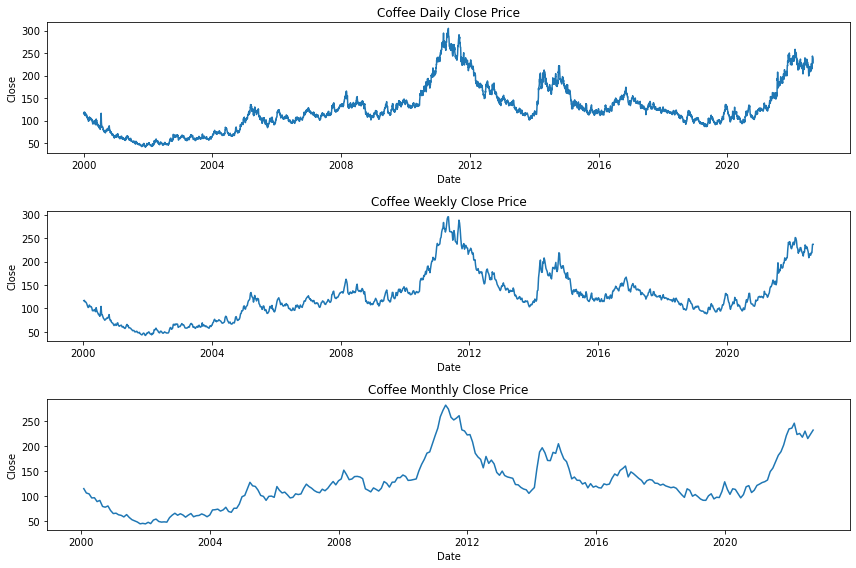

In [6]:
# Resample the data on 'Close' price weekly
sale_weekly = df.resample('W', on='Date').mean()

# Resample the data on 'Close' price monthly
sale_monthly = df.resample('M', on='Date').mean()

# Visualization
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12,8))

sns.lineplot(x='Date', y='Close', data=df, ax=ax1)
ax1.set_title('Coffee Daily Close Price')

sns.lineplot(x='Date', y='Close', data=sale_weekly, ax=ax2)
ax2.set_title('Coffee Weekly Close Price')

sns.lineplot(x='Date', y='Close', data=sale_monthly, ax=ax3)
ax3.set_title('Coffee Monthly Close Price')

plt.tight_layout()


## Train the model


In [7]:
# Dataset for forecasting
coffee_price = df[['Date','Close']]
coffee_price = coffee_price.rename(columns = {'Date':'ds', 'Close':'y'})

# Splitting train-test sets
train_set = coffee_price[:-365]
test_set = coffee_price[-365:]

# Fit the model to the train data
m = Prophet(yearly_seasonality=True )
m.add_country_holidays(country_name='US')
m.fit(train_set)

16:24:20 - cmdstanpy - INFO - Chain [1] start processing
16:24:28 - cmdstanpy - INFO - Chain [1] done processing


## Forecast


<AxesSubplot:xlabel='ds', ylabel='y'>

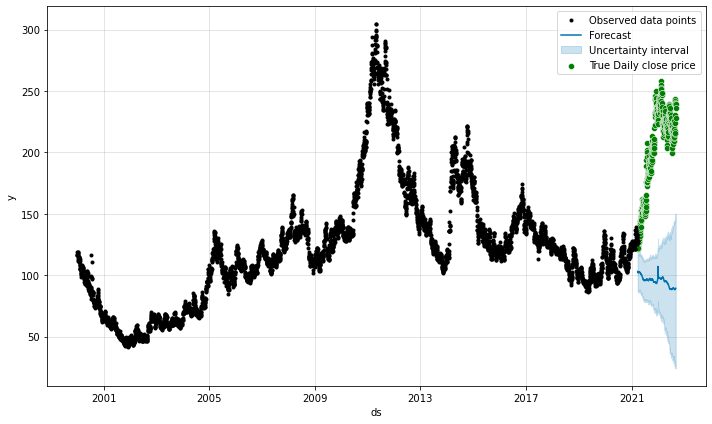

In [8]:
# Forecast model
prophet_pred = m.predict(test_set)

# Plot the forecast results
pred_plot = m.plot(prophet_pred)
sns.scatterplot(x='ds', y='y', data=test_set, color = 'g', label='True Daily close price')


### Findings

- The forecast for the daily close price of coffee over a period of 365 days (solid blue line) is far off from the true  close price (green line).
- Indicating that the data can be influenced by other features leading to a very low accuracy prediction.

## Further Analysis


#### Deeper look into the features resulted from the Test set

In [9]:
prophet_pred.head()

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2021-03-25  101.894239   87.388291  118.875978   101.894239   101.894239   
1 2021-03-26  101.874364   86.852793  118.648982   101.874364   101.874364   
2 2021-03-29  101.814739   86.637607  118.040848   101.814739   101.814739   
3 2021-03-30  101.794863   86.606403  117.739558   101.794863   101.794863   
4 2021-03-31  101.774988   86.306911  117.883276   101.774988   101.774988   

   Christmas Day  Christmas Day_lower  Christmas Day_upper  \
0            0.0                  0.0                  0.0   
1            0.0                  0.0                  0.0   
2            0.0                  0.0                  0.0   
3            0.0                  0.0                  0.0   
4            0.0                  0.0                  0.0   

   Christmas Day (Observed)  ...    weekly  weekly_lower  weekly_upper  \
0                       0.0  ... -0.884969     -0.884969     -0.884969   
1                       0.0  ... -1.077511     -1.077511     -1.077511   
2                       0.0  ... -1.095343     -1.095343     -1.095343   
3                       0.0  ... -0.865276     -0.865276     -0.865276   
4                       0.0  ... -0.829819     -0.829819     -0.829819   

     yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0  2.089961      2.089961      2.089961                   0.0   
1  1.926802      1.926802      1.926802                   0.0   
2  1.541970      1.541970      1.541970                   0.0   
3  1.453662      1.453662      1.453662                   0.0   
4  1.386737      1.386737      1.386737                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper        yhat  
0                         0.0                         0.0  103.099231  
1                         0.0                         0.0  102.723655  
2                         0.0                         0.0  102.261366  
3                         0.0                         0.0  102.383249  
4                         0.0                         0.0  102.331906  

[5 rows x 70 columns]

In [10]:
# plotting on the predicted values from test set
prophet_plot = prophet_pred[['ds','trend','yearly','holidays','yhat']]
prophet_plot = prophet_plot.rename(columns={'yearly':'season'})
prophet_plot.head()

ds       trend    season  holidays        yhat
0 2021-03-25  101.894239  2.089961       0.0  103.099231
1 2021-03-26  101.874364  1.926802       0.0  102.723655
2 2021-03-29  101.814739  1.541970       0.0  102.261366
3 2021-03-30  101.794863  1.453662       0.0  102.383249
4 2021-03-31  101.774988  1.386737       0.0  102.331906

In [11]:
prophet_plot = prophet_plot.sort_values(by='ds')
fig = make_subplots(rows=3, cols=1, subplot_titles=('trend','season','holidays'))

fig.add_trace(go.Scatter(x=prophet_plot['ds'], y=prophet_plot['trend']), row=1, col=1)
fig.add_trace(go.Scatter(x=prophet_plot['ds'], y=prophet_plot['season']), row=2, col=1)
fig.add_trace(go.Scatter(x=prophet_plot['ds'], y=prophet_plot['holidays']), row=3, col=1)

In [12]:
# Fit the model to the data
m = Prophet(yearly_seasonality=True)
m.add_country_holidays(country_name='US')
m.fit(coffee_price)

17:32:46 - cmdstanpy - INFO - Chain [1] start processing
17:32:51 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
# Predict for the next 365-day period
df_pred = m.make_future_dataframe(periods=365, include_history=True)
coffee_pred = m.predict(df_pred)

In [14]:
coffee_plot = coffee_pred[['ds','trend','yearly','holidays']]
coffee_plot = coffee_plot.rename(columns={'yearly':'season'})
coffee_plot.head()

ds       trend    season  holidays
0 2000-01-03  106.606151  3.499964       0.0
1 2000-01-04  106.509236  3.641218       0.0
2 2000-01-05  106.412322  3.763193       0.0
3 2000-01-06  106.315408  3.865800       0.0
4 2000-01-07  106.218494  3.949306       0.0

In [15]:
coffee_plot = coffee_plot.sort_values(by='ds')
fig = make_subplots(rows=3, cols=1, subplot_titles=('trend','season','holidays'))

fig.add_trace(go.Scatter(x=coffee_plot['ds'], y=coffee_plot['trend']), row=1, col=1)
fig.add_trace(go.Scatter(x=coffee_plot['ds'], y=coffee_plot['season']), row=2, col=1)
fig.add_trace(go.Scatter(x=coffee_plot['ds'], y=coffee_plot['holidays']), row=3, col=1)

fig.show()

## Breaking down trend and seasonality

For the test set

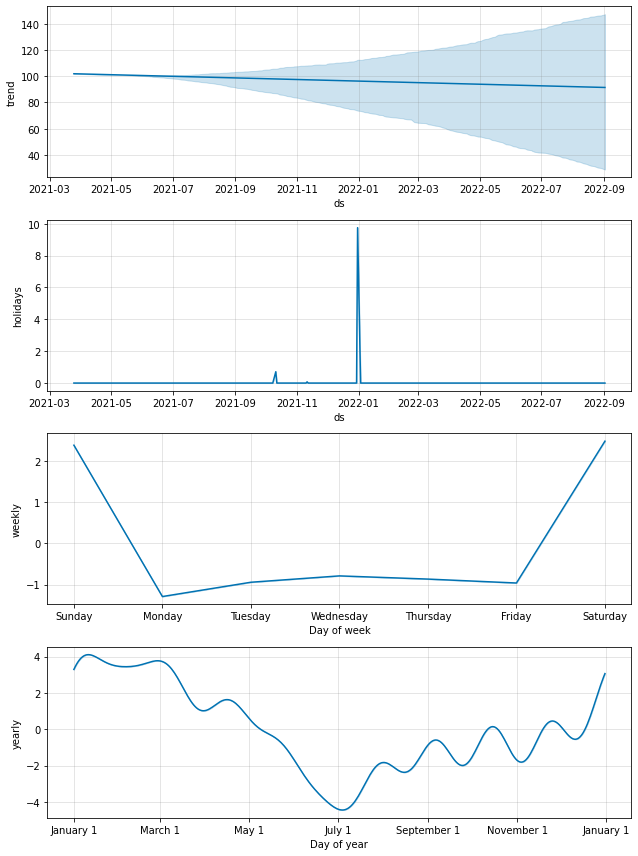

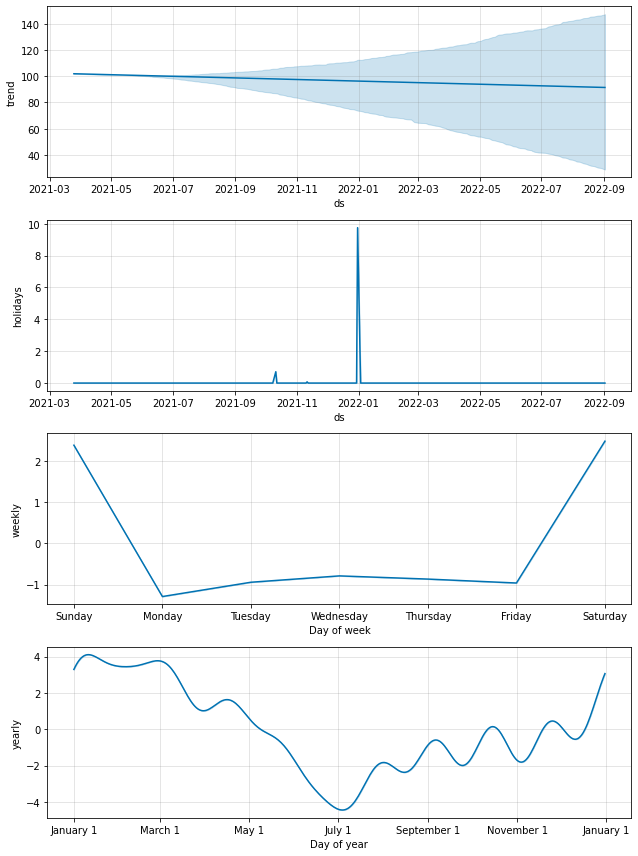

In [16]:
m.plot_components(prophet_pred)

For the original set

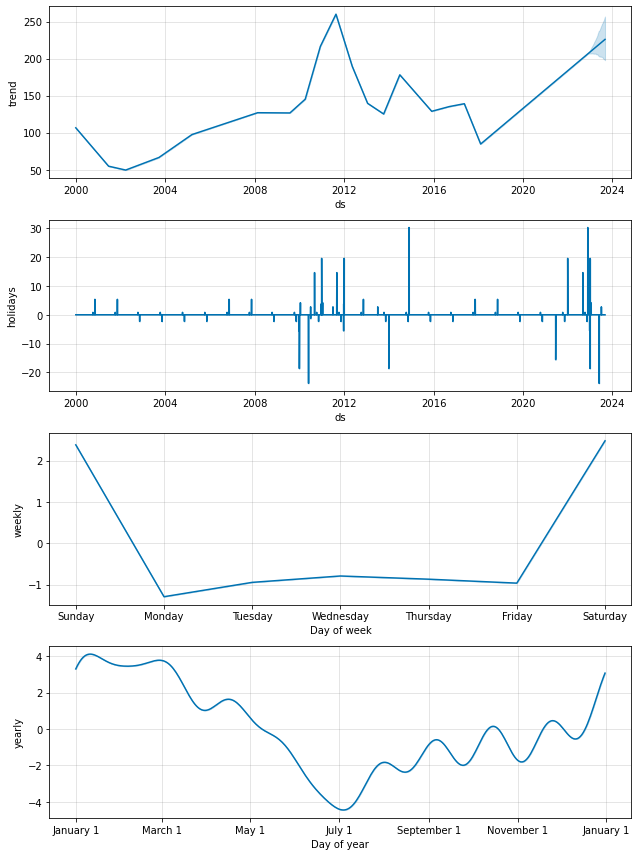

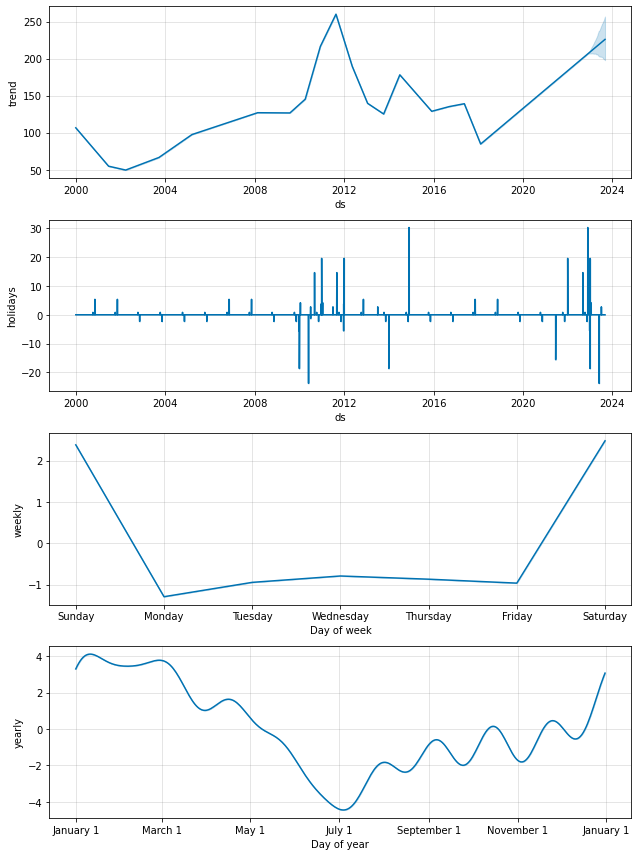

In [17]:
m.plot_components(coffee_pred)

# Conclusion 

- According to the data we have analyzed, it appears that the coffee stock price did not have a clear trend over the period of 2000-2020. While coffee is a widely consumed product, with demand expected to stay stable or increase, we did see a sharp increase in coffee prices starting in 2011 and reaching its peak in 2012. This was likely due to poor weather and farming conditions that resulted in a poor harvest.[1]
<br><br>
- However, the model did not accurately predict coffee prices for the period of 2021-2022. This can be explained by unexpected factors such as poor weather conditions and supply chain issues in Brazil, one of the largest coffee producers in the world, as well as the impact of COVID-19 on freight costs.
<br><br>
- It is also worth noting that coffee prices typically drop in May and pick up again in late July, as seen when analyzing the data for both 2022 and a hypothetical extra 365-day period in 2023. This seasonal trend was observed in both:
    - The comparison of the predicted coffee prices for 2022 with the actual prices in 2022.
    - The prediction of coffee prices for an additional 365-day period (equivalent to one year) in 2023, based on historical data.

<br><br>
[1] https://www.theguardian.com/business/2011/apr/21/commodities-coffee-shortage-price-rise-expected